<a href="https://colab.research.google.com/github/NIlesh-Thamke/Machine-Learning-Practicals/blob/main/pr6ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

In [48]:
df = pd.read_csv('/content/E-commerce.csv')
print(df.head())

   Customer ID  Age  Gender Location  Annual Income  \
0         1001   25  Female   City D          45000   
1         1001   28  Female   City D          52000   
2         1001   28  Female   City D          65000   
3         1001   45  Female   City D          70000   
4         1002   34    Male   City E          45000   

                                    Purchase History  \
0  [{"Date": "2022-03-05", "Category": "Clothing"...   
1  [{"Product Category": "Clothing", "Purchase Da...   
2  [{"Product Category": "Electronics", "Purchase...   
3  {'Purchase Date': '2022-08-15', 'Product Categ...   
4  {'Purchase Date': '2022-07-25', 'Product Categ...   

                                    Browsing History  \
0  [{"Timestamp": "2022-03-10T14:30:00Z"}, {"Time...   
1  [{"Product Category": "Home & Garden", "Timest...   
2  [{"Product Category": "Clothing", "Timestamp":...   
3               {'Timestamp': '2022-09-03 14:30:00'}   
4               {'Timestamp': '2022-08-10 17:15:00'}

In [49]:
df = df.drop(columns=['Customer ID', 'Product Reviews'])

# Encode categorical variables
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Location'] = df['Location'].astype('category').cat.codes

# Create a target variable "Purchased" based on "Purchase History" presence
df['Purchased'] = df['Purchase History'].apply(lambda x: 1 if isinstance(x, str) and len(x) > 2 else 0)

# Drop "Purchase History" since it's now encoded in "Purchased"
df = df.drop(columns=['Purchase History', 'Browsing History'])


In [50]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [52]:
y_pred = model.predict(X_test)

In [53]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [54]:
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model Accuracy: 1.00

Confusion Matrix:
 [[10]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



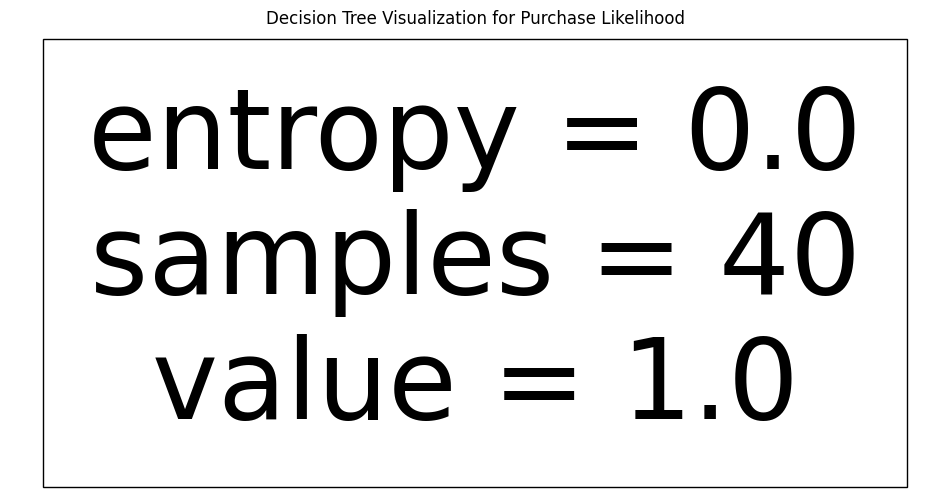

In [55]:
plt.figure(figsize=(12, 6))
# Directly use 'plot_tree' function
# Assign the trained model to 'dtree' or use the original model name 'model'
# In this example, I'm using the original 'model'
plot_tree(model, feature_names=X.columns, class_names=["Low Purchase", "High Purchase"], filled=True)
plt.title("Decision Tree Visualization for Purchase Likelihood")
plt.show()

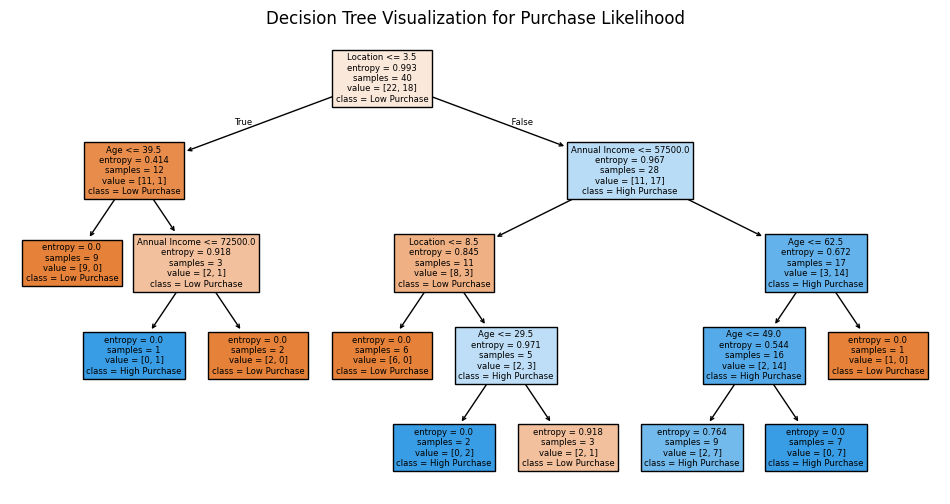

In [61]:
df = df.drop(columns=['Customer ID', 'Purchase History', 'Browsing History', 'Product Reviews'], errors='ignore')

# Plot the trained Decision Tree
plt.figure(figsize=(12, 6))
# Instead of 'tree.plot_tree', use 'plot_tree' directly, since you imported it like that
plot_tree(dtree, feature_names=features, class_names=["Low Purchase", "High Purchase"], filled=True)
plt.title("Decision Tree Visualization for Purchase Likelihood")
plt.show()